In [8]:
from circuits.cp_fraction import cp_fraction, cz_fraction
from GCP_hypergraph import QuantumCircuitHyperGraph
from qiskit import transpile
from FM_methods import set_initial_partitions
from qiskit.circuit.library import QFT, QuantumVolume, EfficientSU2
from circuits.QAOA import QAOA_random
import numpy as np

num_qubits = 32
num_partitions = 4
qpu_size = int(num_qubits / num_partitions) + 1
qpu_info = [qpu_size] * num_partitions

circuit = cp_fraction(  num_qubits=num_qubits,
                        depth=num_qubits,
                        fraction= 0.5)

# circuit = cz_fraction( num_qubits=num_qubits, depth=num_qubits, fraction=0.5)

# circuit = QFT(num_qubits, do_swaps=False)

# circuit = QuantumVolume(num_qubits, depth=num_qubits)

# circuit = QAOA_random(num_qubits, prob = 0.9, reps = 1)

# ansatz = EfficientSU2(num_qubits, entanglement='full', reps=1)

# param_values = np.random.rand(len(ansatz.parameters))
# param_dict = dict(zip(ansatz.parameters, param_values))
# circuit = ansatz.assign_parameters(param_dict)

circuit = transpile(circuit, basis_gates = ['cp', 'u'])

depth = circuit.depth() 

graph = QuantumCircuitHyperGraph(num_qubits=num_qubits, depth=depth)
graph.map_circuit_to_hypergraph(circuit, group_gates=True)

assignment = set_initial_partitions(qpu_info, num_qubits, depth, num_partitions, reduced=True)

In [9]:
from hypergraph_coarsening import *
from tikz_drawing import *
num_blocks = 8
H_list, mappings = coarsen_hypergraph_blocks(graph,num_blocks)
# path = '/Users/ftb123/CP_cleaned_/Git/Paper/Paper/TikZiT/'

# for H in H_list:
#     path_ = path + 'hypergraph_' + str(H_list.index(H)) + '.tikz'
#     print(path_)
#     tikz = hypergraph_to_tikz(H,num_qubits,assignment,qpu_info,depth, sum(qpu_info),xscale = 0.5, yscale=0.5, save=True,path=path_)

Start layer: 31
Layer: 31
Contracted to layer: 30
Number of nodes: 992
Layer: 27
Contracted to layer: 26
Number of nodes: 960
Layer: 23
Contracted to layer: 22
Number of nodes: 928
Layer: 19
Contracted to layer: 18
Number of nodes: 896
Layer: 15
Contracted to layer: 14
Number of nodes: 864
Layer: 11
Contracted to layer: 10
Number of nodes: 832
Layer: 7
Contracted to layer: 6
Number of nodes: 800
Layer: 3
Contracted to layer: 2
Number of nodes: 768
Mapping: {0: {0}, 1: {1}, 2: {2, 3}, 4: {4}, 5: {5}, 6: {6, 7}, 8: {8}, 9: {9}, 10: {10, 11}, 12: {12}, 13: {13}, 14: {14, 15}, 16: {16}, 17: {17}, 18: {18, 19}, 20: {20}, 21: {21}, 22: {22, 23}, 24: {24}, 25: {25}, 26: {26, 27}, 28: {28}, 29: {29}, 30: {30, 31}}
Nodes in block: [(19, 0), (8, 0), (30, 0), (0, 0), (11, 0), (22, 0), (3, 0), (14, 0), (25, 0), (6, 0), (17, 0), (28, 0), (9, 0), (1, 0), (20, 0), (31, 0), (23, 0), (12, 0), (4, 0), (26, 0), (15, 0), (7, 0), (18, 0), (10, 0), (29, 0), (2, 0), (21, 0), (5, 0), (24, 0), (13, 0), (16, 0)

In [10]:
from multilevel_FM import multilevel_FM_flex
from FM_methods import get_all_configs, get_all_costs

configs = get_all_configs(num_partitions)
cost_table = get_all_costs(configs)

num_levels = int(depth/num_blocks)

assignment_list, cost_list = multilevel_FM_flex(coarsened_hypergraphs=H_list,
                                            mapping_list=mappings,
                                           initial_assignment=assignment,
                                           num_partitions=num_partitions,
                                           qpu_info=qpu_info,
                                           num_qubits=num_qubits,
                                           num_levels=num_levels,
                                           depth= depth,
                                           limit = (1/16)*num_qubits*depth,
                                           pass_list=[10]*(num_levels+2),
                                           stochastic=True,
                                           lock_nodes=True,
                                           log=True,
                                           add_initial=False,
                                           costs=cost_table)


Number of coarsened hypergraphs: 4
Initial cost: 149
All passes complete.
Final cost: 104
Verified final cost: 104
Initial cost: 104
All passes complete.
Final cost: 103
Verified final cost: 103
Initial cost: 103
All passes complete.
Final cost: 102
Verified final cost: 102
Initial cost: 102
All passes complete.
Final cost: 101
Verified final cost: 101


In [11]:
from hypergraph_coarsening import coarsen_hypergraph_full

finest_graph = H_list[0]

coarsest_graph = H_list[-1]

print(sorted(coarsest_graph.nodes, key=lambda x: x[1]))

print(sorted(finest_graph.nodes, key=lambda x: x[1]))

mapping = copy.deepcopy(mappings[-1])

graph_list, mapping_list = coarsen_hypergraph_blocks_full(coarsest_graph, mapping)

for graph in graph_list:
    print(sorted(graph.nodes, key=lambda x: x[1]))


[(4, 0), (19, 0), (8, 0), (30, 0), (0, 0), (11, 0), (26, 0), (15, 0), (7, 0), (18, 0), (22, 0), (3, 0), (14, 0), (10, 0), (25, 0), (29, 0), (2, 0), (6, 0), (21, 0), (17, 0), (28, 0), (5, 0), (9, 0), (24, 0), (13, 0), (1, 0), (16, 0), (20, 0), (31, 0), (23, 0), (12, 0), (27, 0), (12, 4), (23, 4), (27, 4), (8, 4), (30, 4), (19, 4), (25, 4), (11, 4), (15, 4), (26, 4), (18, 4), (7, 4), (22, 4), (14, 4), (3, 4), (9, 4), (10, 4), (29, 4), (2, 4), (6, 4), (21, 4), (28, 4), (17, 4), (4, 4), (5, 4), (0, 4), (13, 4), (24, 4), (1, 4), (16, 4), (31, 4), (20, 4), (27, 8), (14, 8), (3, 8), (10, 8), (25, 8), (7, 8), (29, 8), (2, 8), (6, 8), (21, 8), (22, 8), (28, 8), (17, 8), (5, 8), (9, 8), (24, 8), (13, 8), (1, 8), (16, 8), (31, 8), (20, 8), (12, 8), (23, 8), (4, 8), (8, 8), (30, 8), (19, 8), (11, 8), (0, 8), (15, 8), (26, 8), (18, 8), (18, 12), (7, 12), (22, 12), (3, 12), (14, 12), (10, 12), (25, 12), (29, 12), (2, 12), (6, 12), (21, 12), (17, 12), (28, 12), (5, 12), (9, 12), (13, 12), (24, 12), (

In [12]:
from multilevel_FM import *

num_levels = len(graph_list) - 1

assignment_list, cost_list = multilevel_FM_flex(coarsened_hypergraphs=graph_list,
                                            mapping_list=mapping_list,
                                           initial_assignment=assignment,
                                           num_partitions=num_partitions,
                                           qpu_info=qpu_info,
                                           num_qubits=num_qubits,
                                           num_levels=num_levels,
                                           depth= depth,
                                           limit = (1/16)*num_qubits*depth,
                                           pass_list=[10]*(num_levels+2),
                                           stochastic=True,
                                           lock_nodes=True,
                                           log=True,
                                           add_initial=False,
                                           costs=cost_table)

best_assignment = assignment_list[np.argmin(cost_list)]


Number of coarsened hypergraphs: 8
Initial cost: 149
All passes complete.
Final cost: 111
Verified final cost: 111
Initial cost: 111
All passes complete.
Final cost: 113
Verified final cost: 113
Initial cost: 113
All passes complete.
Final cost: 109
Verified final cost: 109
Initial cost: 109
All passes complete.
Final cost: 101
Verified final cost: 101
Initial cost: 101
All passes complete.
Final cost: 100
Verified final cost: 100
Initial cost: 100
All passes complete.
Final cost: 101
Verified final cost: 101
Initial cost: 101
All passes complete.
Final cost: 97
Verified final cost: 97
Initial cost: 97
All passes complete.
Final cost: 98
Verified final cost: 98


In [13]:

num_levels = int(depth/num_blocks)

assignment_list, cost_list = multilevel_FM_flex(coarsened_hypergraphs=H_list,
                                            mapping_list=mappings,
                                           initial_assignment=best_assignment,
                                           num_partitions=num_partitions,
                                           qpu_info=qpu_info,
                                           num_qubits=num_qubits,
                                           num_levels=num_levels,
                                           depth= depth,
                                           limit = (1/16)*num_qubits*depth,
                                           pass_list=[10]*(num_levels+2),
                                           stochastic=True,
                                           lock_nodes=True,
                                           log=True,
                                           add_initial=False,
                                           costs=cost_table)

Number of coarsened hypergraphs: 4
Initial cost: 97
All passes complete.
Final cost: 98
Verified final cost: 98
Initial cost: 98
All passes complete.
Final cost: 95
Verified final cost: 95
Initial cost: 95
All passes complete.
Final cost: 93
Verified final cost: 93
Initial cost: 93
All passes complete.
Final cost: 92
Verified final cost: 92


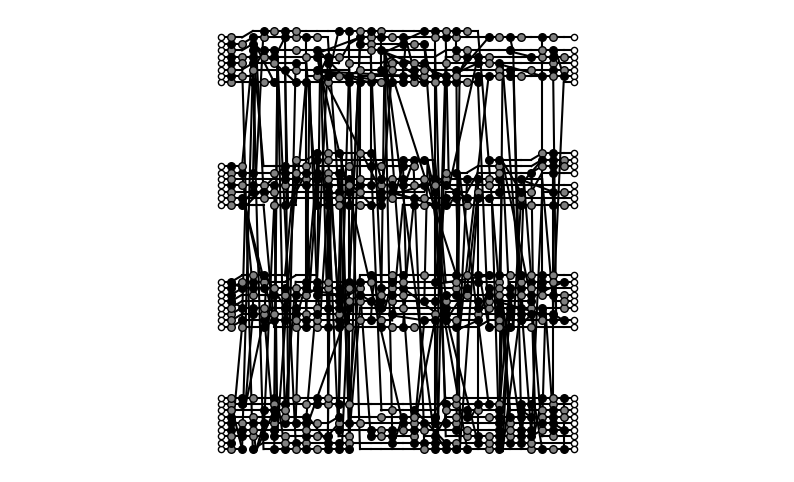

In [14]:
from tikz_drawing import *
from mpl_drawing import *
H = H_list[0]
assignment = assignment_list[np.argmin(cost_list)]

mpl_fig = hypergraph_to_matplotlib(
    H, 
    num_qubits,
    assignment,
    qpu_info,
    depth,
    sum(qpu_info),
    xscale=10.0,
    yscale=6.0,
    figsize=(10, 6),
    save=False,
    path=None,
    ax=None
)